<a href="https://colab.research.google.com/github/fugisawa/deeplearning_for_coders/blob/main/01_DeepLearningForCoders_aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.2 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1,
 'https://i.pinimg.com/originals/c1/77/ee/c177eee70a7f47a7a02eabad6925de86.jpg')

In [ ]:
dest = Path('bird.jpg')
if not dest.exists():
    download_url(urls[0],dest, show_progress=False)

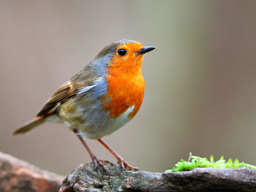

In [ ]:
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
searches = 'bird','squirrel'
path = Path('bird_or_squirrel')

if not path.exists():
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True, parents=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:1000])
        resize_images(dest, max_size=400, dest=dest)

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#10) [None,None,None,None,None,None,None,None,None,None]

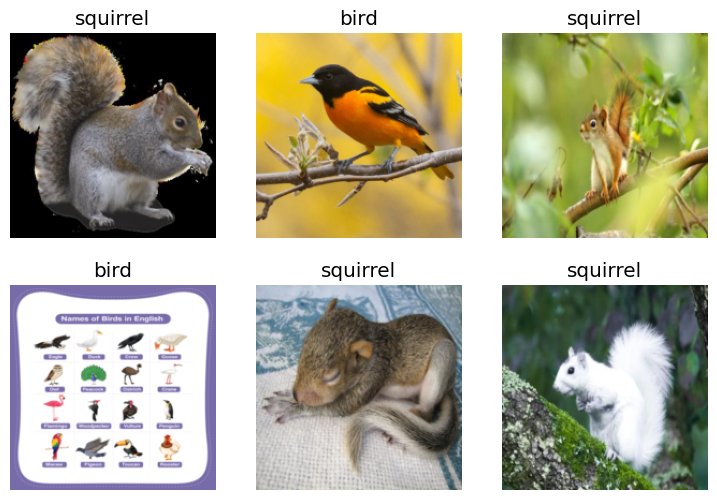

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)


In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 216MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.601982,0.032775,0.013699,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.088098,0.053554,0.013699,00:01
1,0.051255,0.080016,0.013699,00:01
2,0.032549,0.102287,0.013699,00:01
3,0.025831,0.106165,0.013699,00:01
4,0.018938,0.103379,0.013699,00:01
5,0.014389,0.098791,0.013699,00:01


In [ ]:
learn_cnn = cnn_learner(dls, resnet18, metrics=error_rate)
learn_cnn.fine_tune(4, base_lr=0.01)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,0.243119,0.067661,0.013699,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.092955,0.253368,0.054795,00:01
1,0.250666,0.110032,0.027397,00:01
2,0.219774,0.056310,0.013699,00:01
3,0.171738,0.063043,0.013699,00:01


In [ ]:
is_bird, _, probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In [ ]:
is_bird, _, probs = learn_cnn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


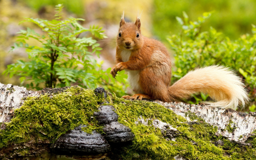

In [ ]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(search_images_ddg('squirrel photo', max_images=1)[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

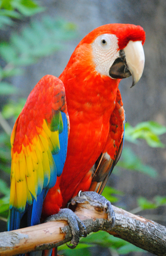

In [ ]:
download_url(search_images_ddg('bird', max_images=1)[0], 'bird', show_progress=False)
Image.open('bird').to_thumb(256,256)

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 181MB/s]


epoch,train_loss,valid_loss,time
0,2.886391,2.308826,00:01


epoch,train_loss,valid_loss,time
0,1.864496,1.673750,00:01
1,1.582393,1.255821,00:01
2,1.451053,1.688134,00:01
3,1.378645,1.167545,00:01
4,1.249778,0.982494,00:01
5,1.128071,0.876038,00:01
6,1.022671,0.838589,00:01
7,0.932610,0.810035,00:01
8,0.856267,0.781177,00:01
9,0.791699,0.795071,00:01


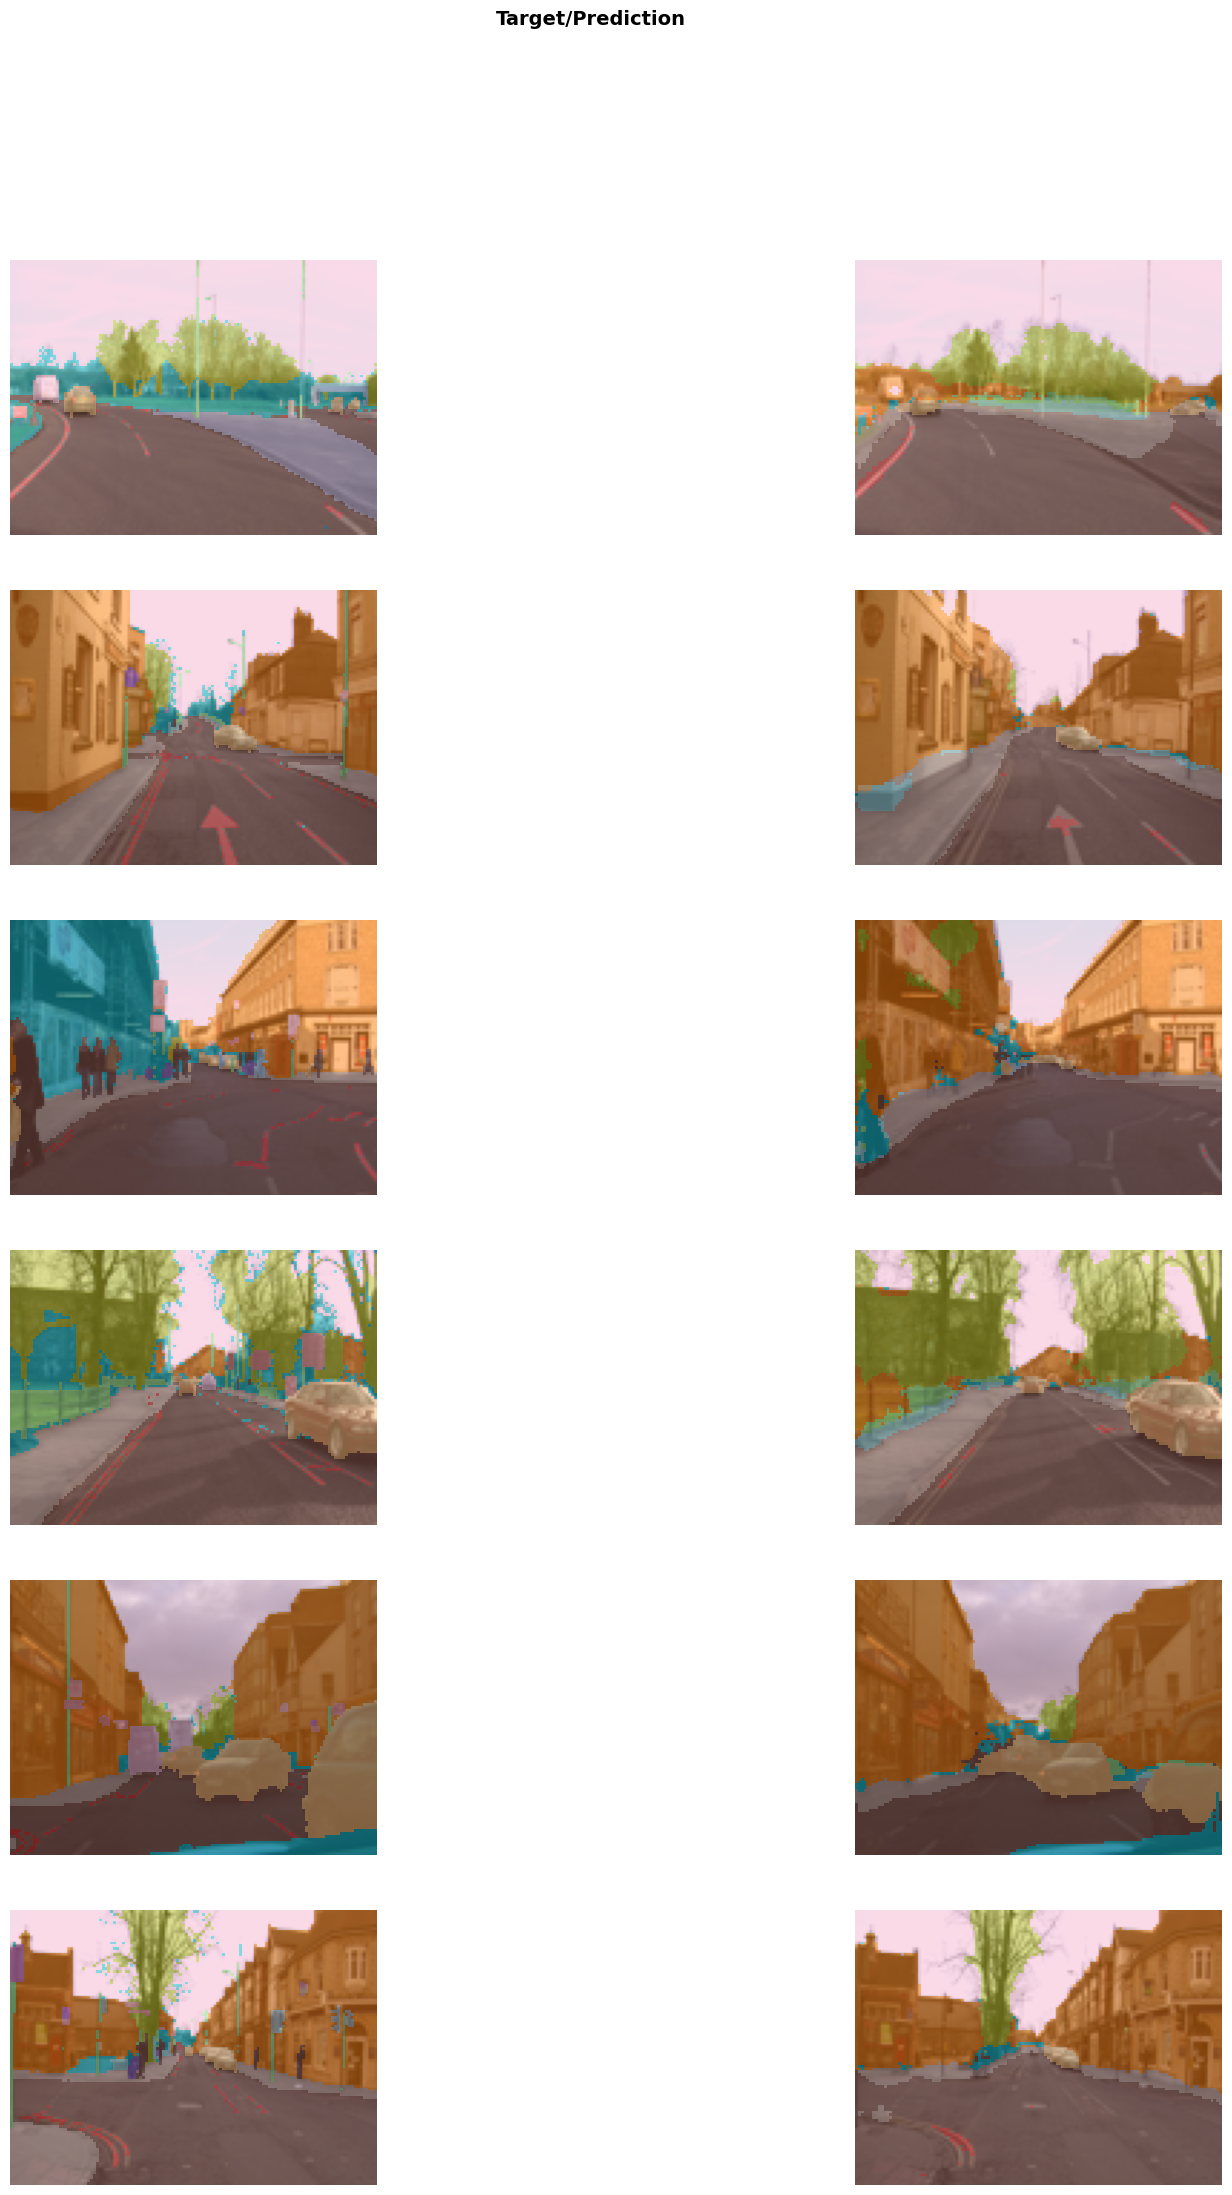

In [ ]:
learn.show_results(max_n=6, figsize=(20,25))

In [ ]:
from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                                            'relationship', 'race'],
                                  cont_names = ['age', 'fnlwgt', 'education-num'],
                                  procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(4)

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


epoch,train_loss,valid_loss,accuracy,time
0,0.382419,0.396017,0.818950,00:04
1,0.359733,0.364626,0.831849,00:04
2,0.354645,0.358394,0.836456,00:04
3,0.350501,0.356696,0.836763,00:04


In [ ]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [ ]:
dls.show_batch()

,userId,movieId,rating
0,285,1206,4.0
1,213,1198,3.0
2,505,1193,3.5
3,480,1136,4.0
4,130,1732,4.0
5,268,5952,4.5
6,654,608,4.0
7,313,165,3.5
8,157,6539,3.0
9,77,367,3.5


In [ ]:
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(20)

epoch,train_loss,valid_loss,time
0,1.506626,1.414711,00:00


epoch,train_loss,valid_loss,time
0,1.378484,1.367601,00:00
1,1.297895,1.288288,00:00
2,1.185952,1.135536,00:00
3,1.016985,0.933613,00:00
4,0.837544,0.778965,00:00
5,0.689690,0.727204,00:00
6,0.644465,0.708907,00:00
7,0.609914,0.700084,00:00
8,0.570017,0.694519,00:00
9,0.553748,0.685830,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,79.0,47.0,5.0,4.713665
1,86.0,16.0,4.5,4.414519
2,99.0,26.0,3.5,3.995663
3,14.0,67.0,3.0,3.587976
4,47.0,80.0,4.5,4.282973
5,22.0,12.0,4.0,2.969716
6,1.0,75.0,3.0,3.418636
7,94.0,90.0,4.5,3.883559
8,87.0,20.0,4.0,3.964746
